# Titanic Problem, Solution

## 1. Using pandas to import the test & train files

In [2]:
import pandas as pd

### 1.1 Use'pwd' to find the current directory. If the test & train files are not in the current directory change the working directory to where the train and test files are stored using the command "cd /.../..../..."

In [3]:
pwd

'C:\\Users\\Jyothilal'

In [4]:
cd /Users/Jyothilal/Downloads/kaggle/titanic

C:\Users\Jyothilal\Downloads\kaggle\titanic


### 1.2 train.csv and test.csv are stored to train & test

In [5]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

### 1.3 In order to see the column heads of the data & its diamensions. 

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.shape

(418, 11)

### 1.4 Checking for missing fields in data

#### "train.info()" gives the idea about the missing fields in data. for example against age its given 714 non null, means (891-714 )177 cells under Age is missing. We can use the code "train.isnull ().sum ()" to get the total null values in each column.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
test.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 2. Data visualisation

#### Using matplot & seaborn

#### Note down the inference

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns .set ()

### 2.1 Creating a function to plot bar charts against features

In [13]:
def bar_chart (feature):
    alive = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    ad = pd.DataFrame([alive,dead])
    ad.index = ['Alive', 'Dead']
    ad.plot (kind = 'bar', stacked = False, figsize =(8,4))

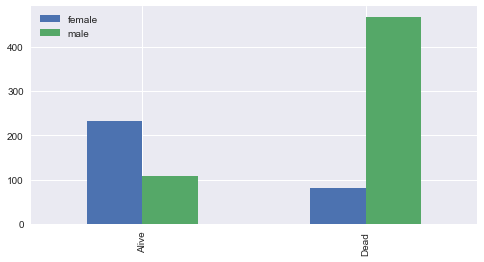

In [14]:
bar_chart ('Sex')

#### Female had a more chance of survival

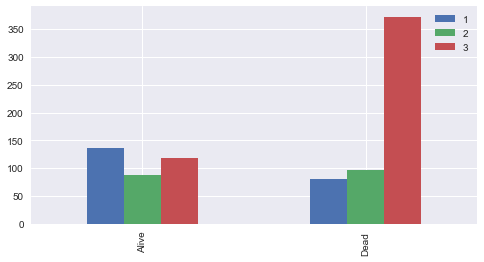

In [15]:
bar_chart ('Pclass')

#### Class 1 have a chance of more survival.

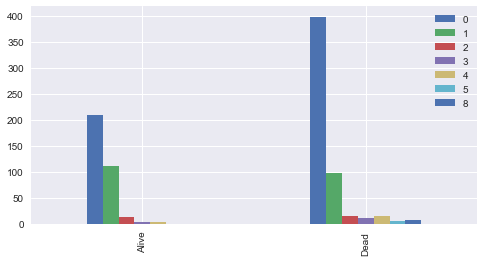

In [16]:
bar_chart ('SibSp')

#### People with sblings have a more chnace of survival. Especially with the value 1

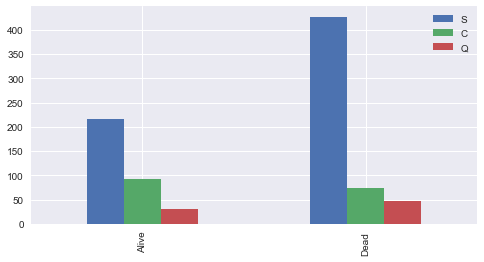

In [17]:
bar_chart ('Embarked')

#### People in the C more likely to survive

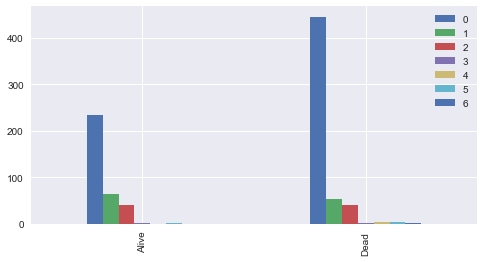

In [18]:
bar_chart ('Parch')

#### Inference very much similar to 'SibSp'

## 3. Feature Engineering

Features are : PassengerId, Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,

Distinction in the features should be done using numbers. Eg : Gender (M & F) changed to 1 & 2

In [19]:
train_plus_test = [train,test]

### 3.1 Name

Trying to derive a tittleclass (Mr,Mrs,Miss...) from name of passengers.

In [20]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand= False)
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand= False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Sir           1
Capt          1
Don           1
Lady          1
Mme           1
Jonkheer      1
Countess      1
Ms            1
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

#### 3.1.1Title mapping
     Master: 0
     Mr : 1
     Mrs,Dona : 2
     Others : 3
     Miss : 4

In [23]:
title_class = {"Mr": 1,"Master":0, "Miss": 4,"Mrs" : 2, "Dr": 3,"Rev":3, "Major":3,
               "Col":3,"Mme":3,"Lady":3,"Ms":3, "Sir":3,"Capt":3,"Don":3,"Jonkheer":3,"Countess":3,"Mlle":3,"Dona":2}
for data in train_plus_test:
    data['Title'] = data['Title'].map(title_class)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


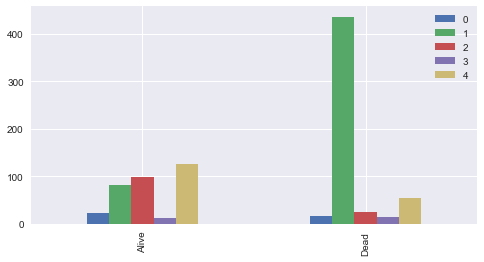

In [25]:
bar_chart('Title')

#### From the Name column we derivrd the Title class feature. So we don't need that any more. 

In [26]:
train.drop('Name', axis=1,inplace=True)
test.drop('Name', axis=1,inplace=True)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1


## 3.2 Sex

Male : 1
Female : 2

In [28]:
sex_class = {"male": 1,"female": 2}
for data in train_plus_test:
    data['Sex'] = data['Sex'].map(sex_class)

In [29]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,2,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,1,35.0,0,0,373450,8.0500,NaN,S,1


## 3.3 Age

From 1.4 we came to know that some values are missing in this column.So intially we have to fill that.

Here i decided to use median for each section to be replaced in the missing cell based on the title given since the age distribution is not a continuous normal distribution 

In [30]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


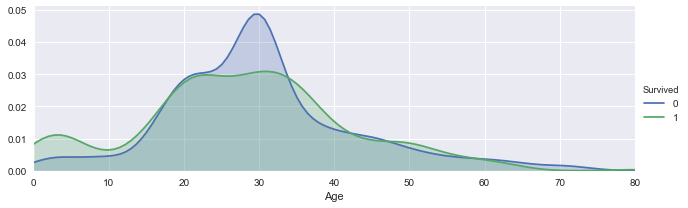

In [32]:
age_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
age_plot.map(sns.kdeplot,'Age', shade = True)
age_plot.set(xlim=(0,train['Age'].max()))
age_plot.add_legend()

plt.show()

(0, 17)

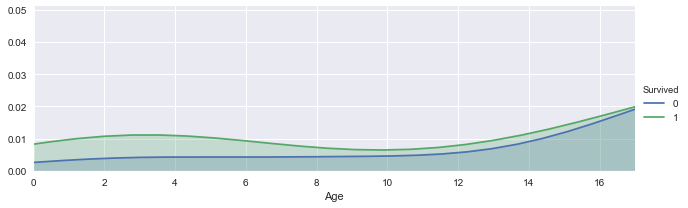

In [33]:
age_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
age_plot.map(sns.kdeplot,'Age', shade = True)
age_plot.set(xlim=(0,train['Age'].max()))
age_plot.add_legend()
plt.xlim(0,17)

(17, 34)

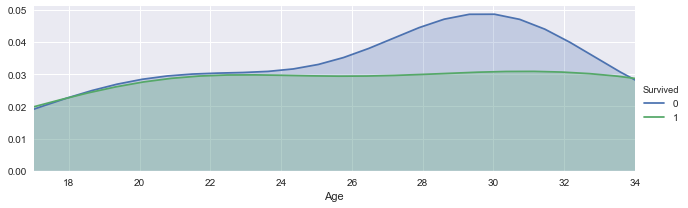

In [34]:
age_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
age_plot.map(sns.kdeplot,'Age', shade = True)
age_plot.set(xlim=(0,train['Age'].max()))
age_plot.add_legend()
plt.xlim(17,34)

(34, 41)

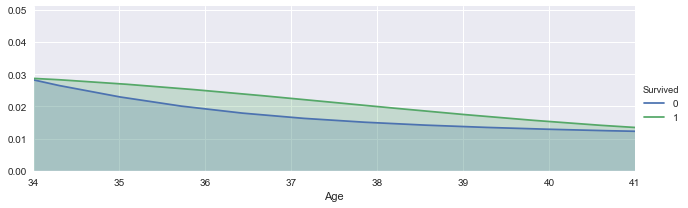

In [35]:
age_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
age_plot.map(sns.kdeplot,'Age', shade = True)
age_plot.set(xlim=(0,train['Age'].max()))
age_plot.add_legend()
plt.xlim(34,41)

(41, 56)

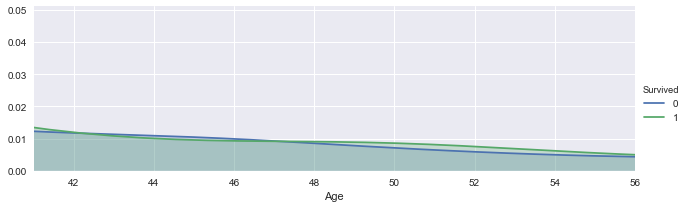

In [36]:
age_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
age_plot.map(sns.kdeplot,'Age', shade = True)
age_plot.set(xlim=(0,train['Age'].max()))
age_plot.add_legend()
plt.xlim(41,56)

(56, 80)

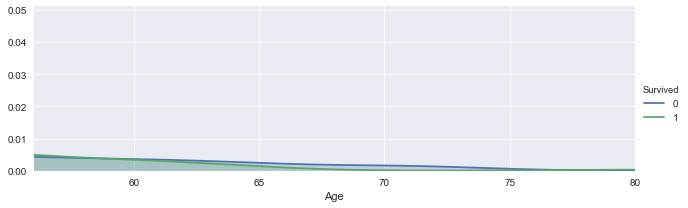

In [37]:
age_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
age_plot.map(sns.kdeplot,'Age', shade = True)
age_plot.set(xlim=(0,train['Age'].max()))
age_plot.add_legend()
plt.xlim(56,80)

(48, 65)

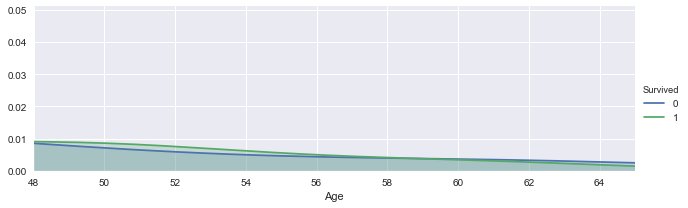

In [38]:
age_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
age_plot.map(sns.kdeplot,'Age', shade = True)
age_plot.set(xlim=(0,train['Age'].max()))
age_plot.add_legend()
plt.xlim(48,65)

From the above plots different age bands were selected based on the chance of survival. These age bands are given indexing from 5 to 0. This process is binning.

In [39]:
for data in train_plus_test:
    data.loc[(data["Age"]<=16),"Age"]= 5,
    data.loc[(data["Age"]>16) & (data["Age"]<=24), "Age"] = 4,
    data.loc[(data["Age"]>24) & (data["Age"]<=34), "Age"] = 3,
    data.loc[(data["Age"]>34) & (data["Age"]<=41), "Age"] = 2,
    data.loc[(data["Age"]>41) & (data["Age"]<=56), "Age"] = 1,
    data.loc[(data["Age"]>56) , "Age"] = 0

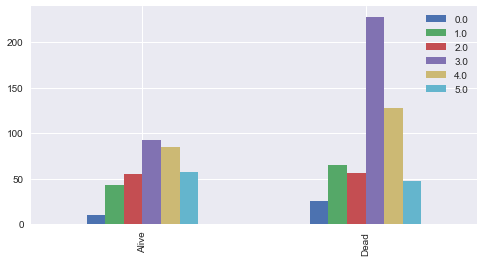

In [40]:
bar_chart('Age')

## 3.4 Embarked

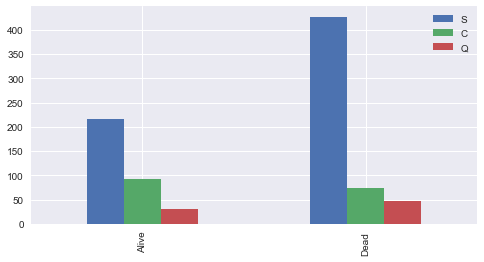

In [41]:
bar_chart('Embarked')

We are trying to find the economic background of people (Class - 1,2,3) from different embarked.

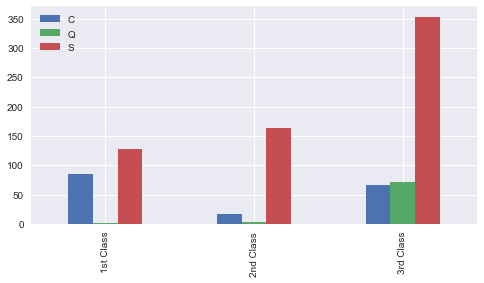

In [42]:
first_class = train[train['Pclass']==1]['Embarked'].value_counts()
second_class = train[train['Pclass']==2]['Embarked'].value_counts()
third_class = train[train['Pclass']==3]['Embarked'].value_counts()
ce = pd.DataFrame([first_class,second_class,third_class])
ce.index =  ['1st Class','2nd Class', '3rd Class']
ce.plot(kind ='bar',stacked = False, figsize=(8,4))

people from 'S' embarked is the largest in all classes hence embarked cells values which are missing is equated to S. And all the embarked are indexed from 0 to 2

In [43]:
for data in train_plus_test:
    data ['Embarked'] = data ['Embarked'].fillna('S')

In [44]:
embark_index = {"S":2,"Q" :1,"C":0} 
for data in train_plus_test:
    data ['Embarked'] = data ['Embarked'].map(embark_index)

In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,4.0,1,0,A/5 21171,7.2500,NaN,2,1
1,2,1,1,2,2.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,2,3.0,0,0,STON/O2. 3101282,7.9250,NaN,2,4
3,4,1,1,2,2.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,1,2.0,0,0,373450,8.0500,NaN,2,1


## 3.5 Fare

One value was missing in train set

In [46]:
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"),inplace=True)

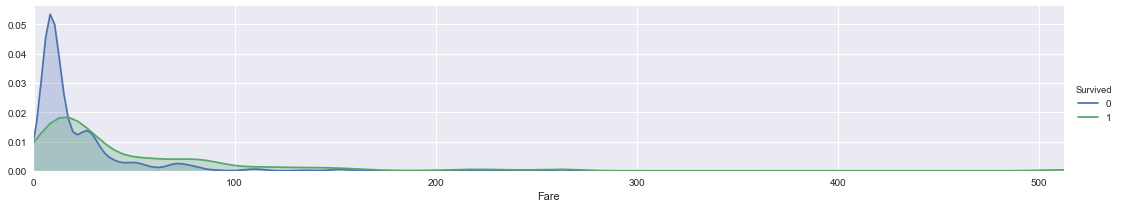

In [47]:
fare_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 5)
fare_plot.map(sns.kdeplot,'Fare', shade = True)
fare_plot.set(xlim=(0,train['Fare'].max()))
fare_plot.add_legend()

plt.show()

From above graph,we came to know that fare for some people are entered as '0'. Mostly they will be workers of titanic and their survival chance is very less.

(0, 17.5)

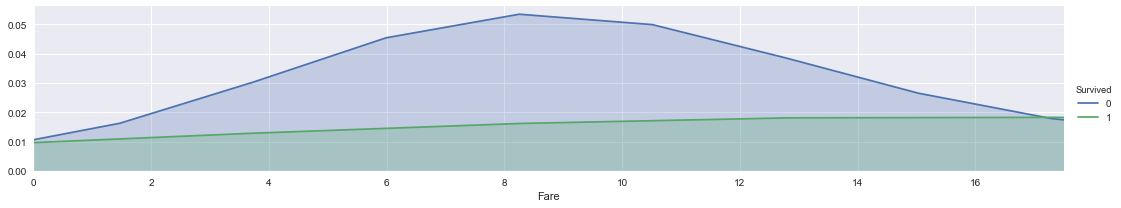

In [48]:
fare_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 5)
fare_plot.map(sns.kdeplot,'Fare', shade = True)
fare_plot.set(xlim=(0,train['Fare'].max()))
fare_plot.add_legend()
plt.xlim(0,17.5)

(17.5, 26)

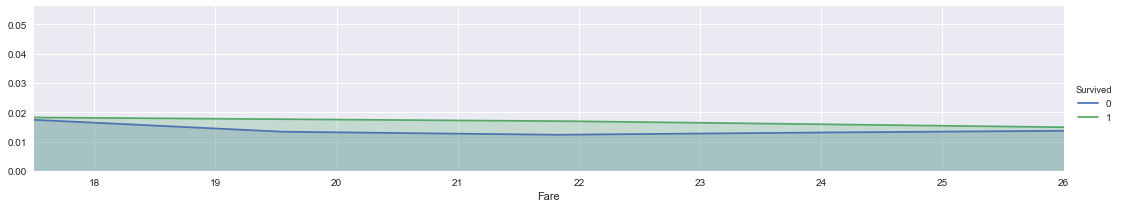

In [49]:
fare_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 5)
fare_plot.map(sns.kdeplot,'Fare', shade = True)
fare_plot.set(xlim=(0,train['Fare'].max()))
fare_plot.add_legend()
plt.xlim(17.5,26)

(26, 30)

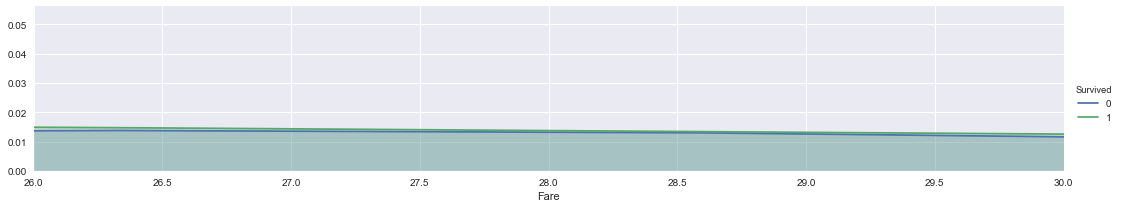

In [50]:
fare_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 5)
fare_plot.map(sns.kdeplot,'Fare', shade = True)
fare_plot.set(xlim=(0,train['Fare'].max()))
fare_plot.add_legend()
plt.xlim(26,30)

(30, 250)

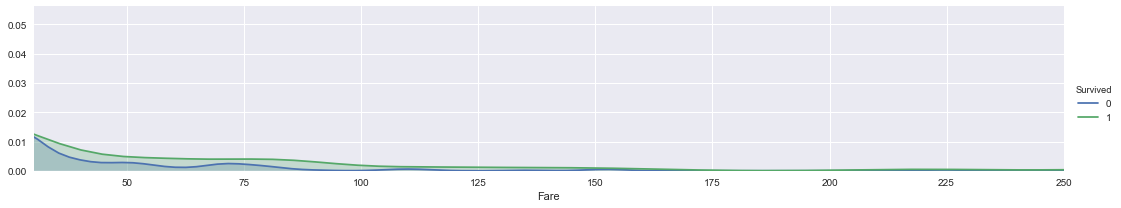

In [51]:
fare_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 5)
fare_plot.map(sns.kdeplot,'Fare', shade = True)
fare_plot.set(xlim=(0,train['Fare'].max()))
fare_plot.add_legend()
plt.xlim(30,250)

In [52]:
for data in train_plus_test:
    data.loc[(data["Fare"]== 0), "Fare"] = 0,
    data.loc[(data["Fare"] > 0) & (data["Fare"] <= 18), "Fare"] = 1,
    data.loc[(data["Fare"] > 18) & (data["Fare"] <= 26), "Fare"] = 2,
    data.loc[(data["Fare"]> 26) & (data["Fare"]<= 30), "Fare"] = 3,
    data.loc[(data["Fare"] > 30),  "Fare"] = 4

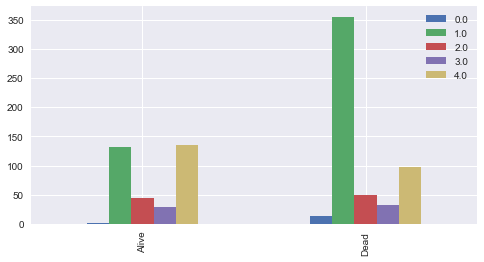

In [53]:
bar_chart('Fare')

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 36.0+ KB


## 3.6 Cabin

In [55]:
train['Cabin'].isnull().sum()

687

The missing fileldscan be filled using Pclass, but i decided to ignore this feature for this modelling. Can be used in optimising the model after wards.

In [56]:
train.drop('Cabin', axis=1,inplace=True)
test.drop('Cabin', axis=1,inplace=True)

## 3.7 SIbSb & Parch (Family Size)

'1' is added to the code so that solo travellers like "Jack" can have a family size of 1. You can proceed by keeping it zero.

In [57]:
train['Fsize'] = train["SibSp"] + train["Parch"]+1
test['Fsize'] = test["SibSp"] + test["Parch"]+1

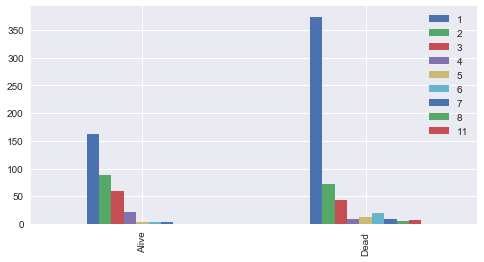

In [58]:
bar_chart('Fsize')

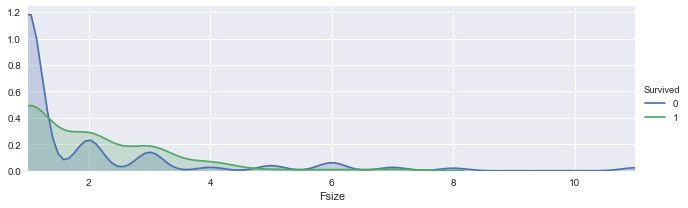

In [59]:
fsize_plot = sns.FacetGrid(train, hue = 'Survived', aspect = 3)
fsize_plot.map(sns.kdeplot,'Fsize', shade = True)
fsize_plot.set(xlim=(1,train['Fsize'].max()))
fsize_plot.add_legend()

plt.show()

if you are a solo traveller or having a family of more than 5 the chance of survival is very low

In [60]:
fsize_index = {1: 0, 2: 1, 3: 1.5, 4: 2, 5: .5, 6: .5, 7: .5, 8: .5,  9: .5, 10: .5, 11:.5} 
for data in train_plus_test:
    data ['Fsize'] = data ['Fsize'].map(fsize_index)

In [61]:
fsize_drop = ['SibSp', 'Parch']
train.drop(fsize_drop, axis=1,inplace=True)
test.drop(fsize_drop, axis=1,inplace=True)

## 3.8 Ticket

for initial modelling Iam dropping thicket feature also

In [62]:
train.drop('Ticket', axis=1,inplace=True)
test.drop('Ticket', axis=1,inplace=True)

For training the alogorithm, passenger id is also dropped from train data

In [63]:
train.drop('PassengerId', axis=1,inplace=True)

In [64]:
features = train.drop('Survived', axis=1)
target = train['Survived']

In [65]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [66]:
features.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Fsize
0,3,1,4.0,1.0,2,1,1.0
1,1,2,2.0,4.0,0,2,1.0
2,3,2,3.0,1.0,2,4,0.0
3,1,2,2.0,4.0,2,2,1.0
4,3,1,2.0,1.0,2,1,0.0


## 4 Modelling

In [67]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.tree import DecisionTreeClassifier as tree
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.svm import SVC

import numpy as np

### 4.2 Cross Validation (k-fold)

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

### 4.2.1 kNN

In [69]:
clf = knc(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf,features,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
round(np.mean(score)*100,2)

[0.76666667 0.7752809  0.79775281 0.7752809  0.79775281 0.7752809
 0.7752809  0.76404494 0.78651685 0.80898876]


78.23

### 4.2.2 Decision Tree

In [70]:
clf = tree()
scoring = 'accuracy'
score = cross_val_score(clf,features,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
round(np.mean(score)*100,2)

[0.8        0.80898876 0.75280899 0.79775281 0.84269663 0.79775281
 0.83146067 0.79775281 0.75280899 0.80898876]


79.91

### 4.2.3 Random Forest

In [71]:
clf = rfc(n_estimators = 6)
scoring = 'accuracy'
score = cross_val_score(clf,features,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
round(np.mean(score)*100,2)

[0.77777778 0.85393258 0.80898876 0.78651685 0.83146067 0.80898876
 0.84269663 0.83146067 0.76404494 0.80898876]


81.15

### 4.2.3 Naive Bayes

In [72]:
clf = gnb()
scoring = 'accuracy'
score = cross_val_score(clf,features,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
round(np.mean(score)*100,2)

[0.76666667 0.78651685 0.74157303 0.70786517 0.73033708 0.79775281
 0.7752809  0.7752809  0.80898876 0.78651685]


76.77

### 4.2.4 SVM

In [75]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,features,target, cv = k_fold, n_jobs = 1, scoring = scoring)
print(score)
round(np.mean(score)*100,2)

[0.8        0.79775281 0.82022472 0.80898876 0.79775281 0.80898876
 0.83146067 0.82022472 0.80898876 0.84269663]


81.37

## 5 Testing

In [85]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Title          0
Fsize          0
dtype: int64

In [86]:
clf = SVC()
clf.fit(features, target)

test_data = test.drop("PassengerId",axis=1).copy()
output = clf.predict(test_data)

In [87]:
submission = pd.DataFrame({"PassengerId" : test["PassengerId"], "Survived" : output})
submission.to_csv('submission1.csv', index = False)

In [88]:
submission = pd.read_csv('submission1.csv')

In [90]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### wow moment

Got a submission score of 0.83 :)